In [1]:
# Import data science packages
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import radians

In [2]:
# Import machine learning packages
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import precision_score, accuracy_score, recall_score, confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals import joblib

In [1]:
# Import data through preprocessing script
import preprocess_data
data = preprocess_data.Preprocess()
df = data.ksmo()

In [4]:
sns.set_style('whitegrid')
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['text.color'] = 'k'
plt.rcParams['figure.figsize'] = 20, 16

In [2]:
df.head()

,date,fog,rain,meanwdird,meanwindspdm,meantempm,meandewptm,meanpressurem,maxhumidity,minhumidity,maxtempm,mintempm,maxdewptm,mindewptm,maxpressurem,minpressurem,precipm,mhumidity
0,1997-01-01,0,1,236,3.0,18.0,14.0,1020.0,100.0,64.0,20.0,15.0,16.0,13.0,1022.0,1019.0,0.0,82.0
1,1997-01-02,1,0,207,5.0,16.0,16.0,1017.0,100.0,94.0,17.0,15.0,16.0,15.0,1020.0,1016.0,0.0,97.0
2,1997-01-03,1,0,251,14.0,17.0,11.0,1015.0,100.0,42.0,19.0,15.0,15.0,4.0,1017.0,1015.0,0.0,71.0
3,1997-01-04,0,0,91,13.0,14.0,11.0,1019.0,94.0,63.0,17.0,13.0,12.0,10.0,1021.0,1018.0,0.0,78.5
4,1997-01-05,0,0,281,13.0,13.0,7.0,1017.0,88.0,36.0,16.0,12.0,10.0,-2.0,1018.0,1016.0,0.0,62.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5408 entries, 0 to 5477
Data columns (total 18 columns):
date             5408 non-null object
fog              5408 non-null int64
rain             5408 non-null int64
meanwdird        5408 non-null int64
meanwindspdm     5408 non-null float64
meantempm        5408 non-null float64
meandewptm       5408 non-null float64
meanpressurem    5408 non-null float64
maxhumidity      5408 non-null float64
minhumidity      5408 non-null float64
maxtempm         5408 non-null float64
mintempm         5408 non-null float64
maxdewptm        5408 non-null float64
mindewptm        5408 non-null float64
maxpressurem     5408 non-null float64
minpressurem     5408 non-null float64
precipm          5408 non-null float64
mhumidity        5408 non-null float64
dtypes: float64(14), int64(3), object(1)
memory usage: 802.8+ KB


In [7]:
df.describe()

,fog,rain,meanwdird,meanwindspdm,meantempm,meandewptm,meanpressurem,maxhumidity,minhumidity,maxtempm,mintempm,maxdewptm,mindewptm,maxpressurem,minpressurem,precipm,mhumidity
count,5408.000000,5408.000000,5408.000000,5408.000000,5408.000000,5408.000000,5408.000000,5408.000000,5408.000000,5408.000000,5408.000000,5408.000000,5408.000000,5408.000000,5408.000000,5408.000000,5408.000000
mean,0.053070,0.096893,206.825999,7.249075,17.007027,10.142197,1015.233615,84.685281,49.496302,21.155510,13.367788,12.605214,7.186945,1017.006287,1013.526812,0.599135,67.090791
std,0.224193,0.295840,73.475321,3.701791,3.569535,5.596071,3.825172,12.408588,18.454689,4.098569,3.771724,3.967273,7.528111,4.025666,3.884930,3.916247,14.023748
min,0.000000,0.000000,-1.000000,2.000000,6.000000,-19.000000,990.000000,16.000000,4.000000,11.000000,1.000000,-13.000000,-23.000000,998.000000,976.000000,0.000000,11.000000
25%,0.000000,0.000000,204.000000,5.000000,14.000000,8.000000,1013.000000,81.000000,38.000000,18.000000,11.000000,11.000000,3.000000,1014.000000,1011.000000,0.000000,61.000000
50%,0.000000,0.000000,224.000000,6.000000,17.000000,11.000000,1015.000000,87.000000,55.000000,21.000000,13.000000,13.000000,9.000000,1016.000000,1013.000000,0.000000,70.000000
75%,0.000000,0.000000,236.000000,10.000000,19.000000,14.000000,1017.000000,93.000000,63.000000,24.000000,16.000000,16.000000,13.000000,1020.000000,1016.000000,0.000000,76.500000
max,1.000000,1.000000,360.000000,50.000000,30.000000,21.000000,1031.000000,100.000000,94.000000,39.000000,26.000000,24.000000,20.000000,1032.000000,1029.000000,74.170000,97.000000


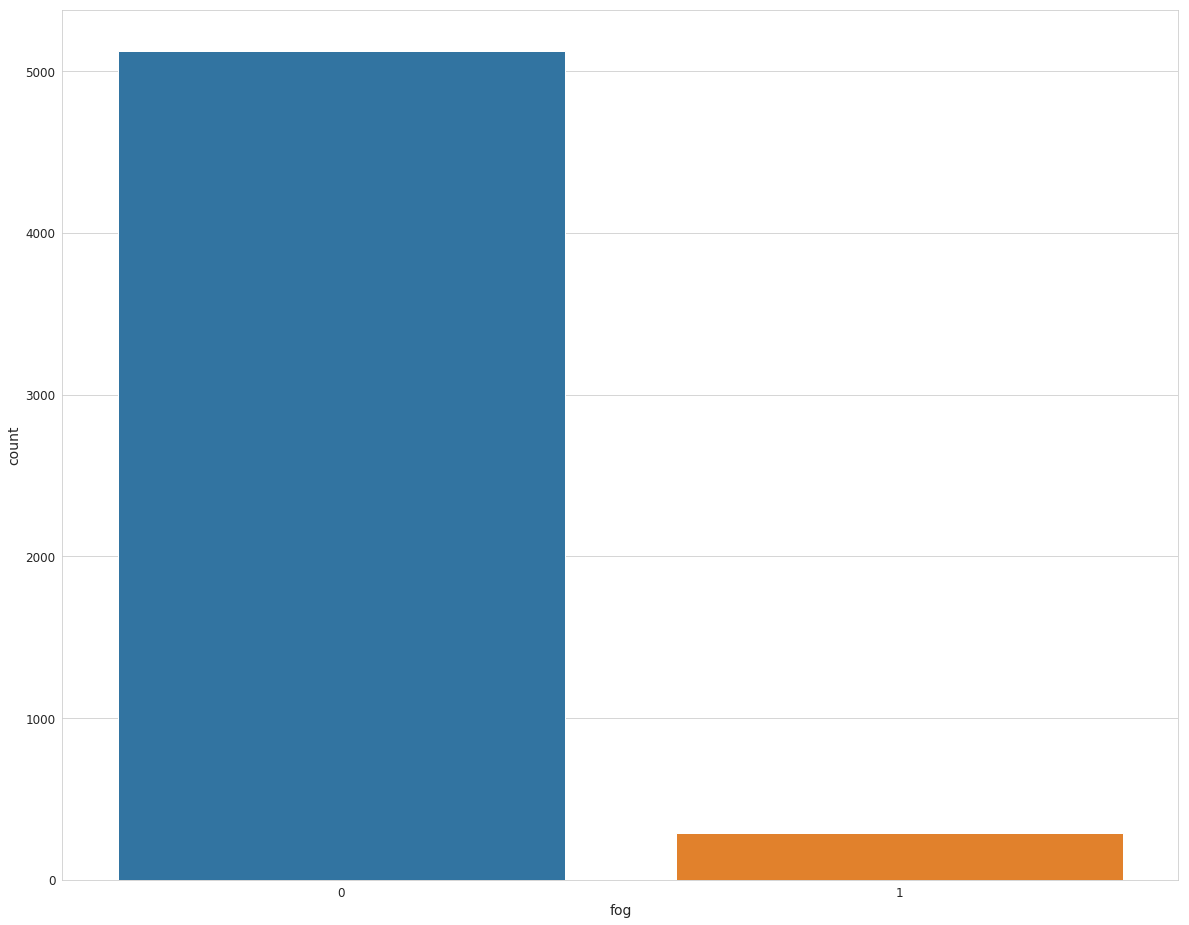

In [8]:
sns.countplot(df['fog'])

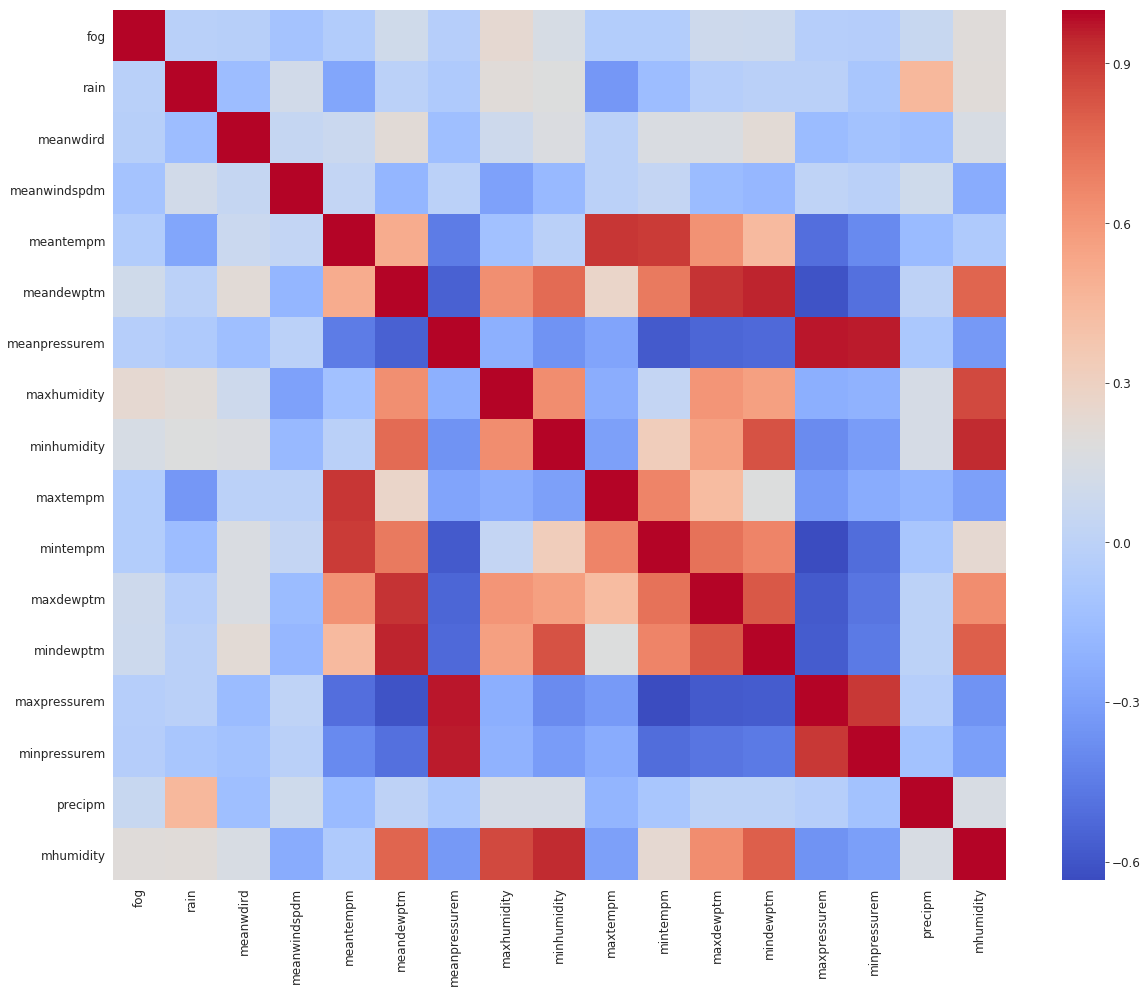

In [9]:
# We have some highly correlated features
sns.heatmap(df.corr(), cmap='coolwarm')

# Using PCA to reduce dimensionality

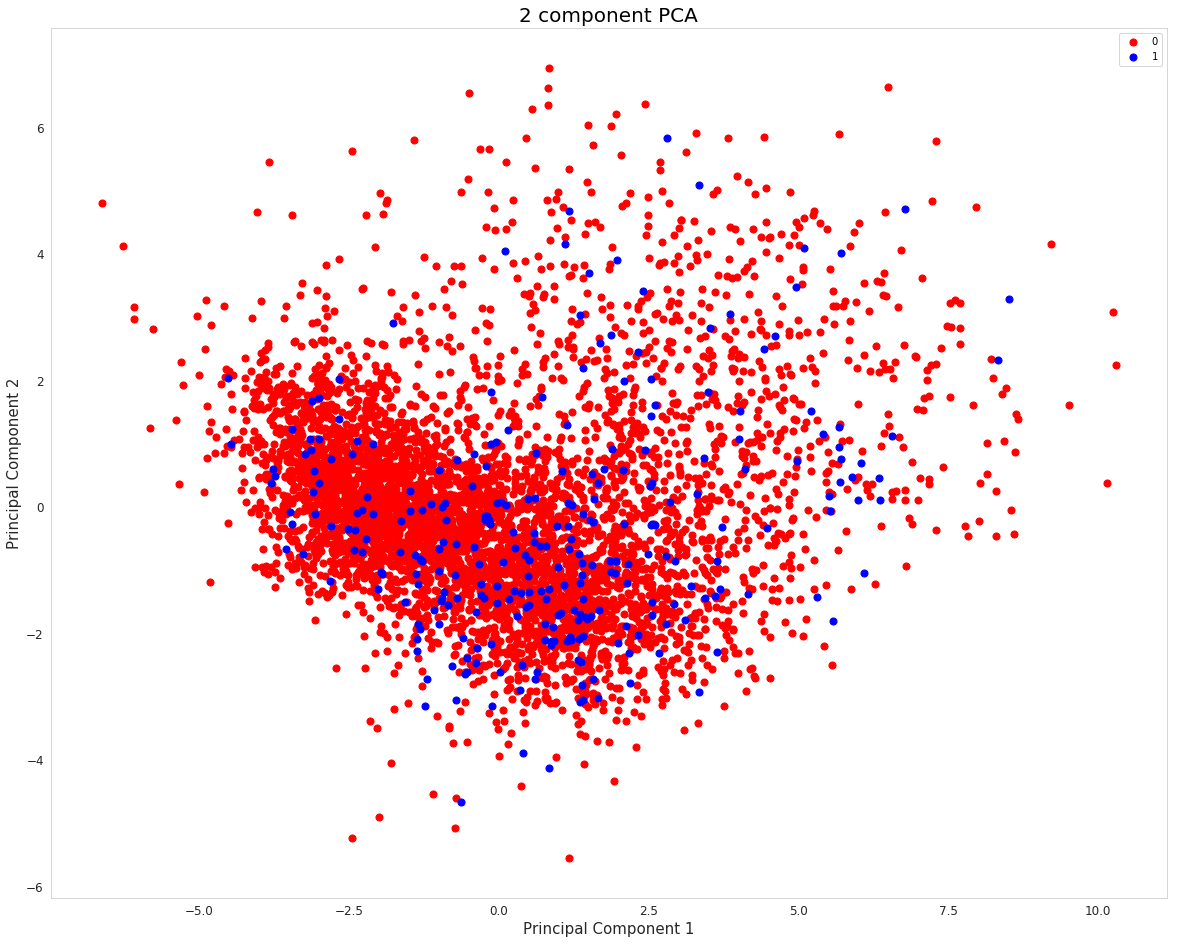

In [10]:
features = ['meanwdird', 'meanwindspdm', 'meantempm', 'meandewptm', 
            'meanpressurem', 'maxhumidity', 'minhumidity', 'maxtempm', 
            'mintempm', 'maxdewptm', 'mindewptm', 'maxpressurem',
            'minpressurem', 'precipm']

# Separate out features
x = df.loc[:, features].values

# Separate out target
y = df.loc[:, ['fog']].values

# Standardize features
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(x)
principal_df = pd.DataFrame(data=principal_components, columns=['p1', 'p2'])

pca_df = pd.concat([principal_df, df[['fog']]], axis=1)

pca_df.head()

fig = plt.figure()
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = pca_df['fog'] == target
    ax.scatter(pca_df.loc[indicesToKeep, 'p1']
               , pca_df.loc[indicesToKeep, 'p2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

# Exploratory Data Analysis

/home/samco/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Distribution of Mean Wind Bearing')

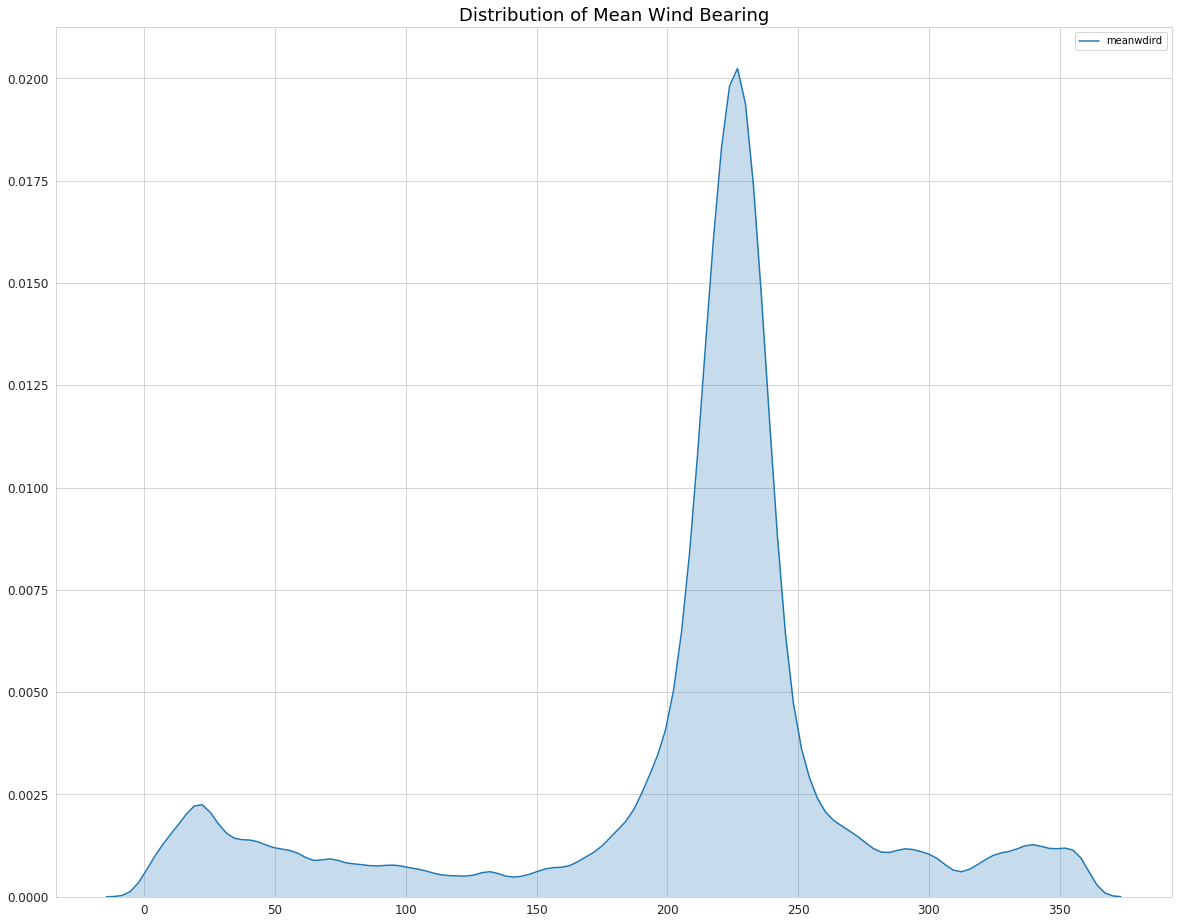

In [11]:
# We can clearly see the prevailing winds coming from a SW direction (from the ocean)
# There's also a couple interesting bumps coming from the East - the Santa Ana Winds
sns.kdeplot(df['meanwdird'], shade=True)

plt.title("Distribution of Mean Wind Bearing", fontsize=18)

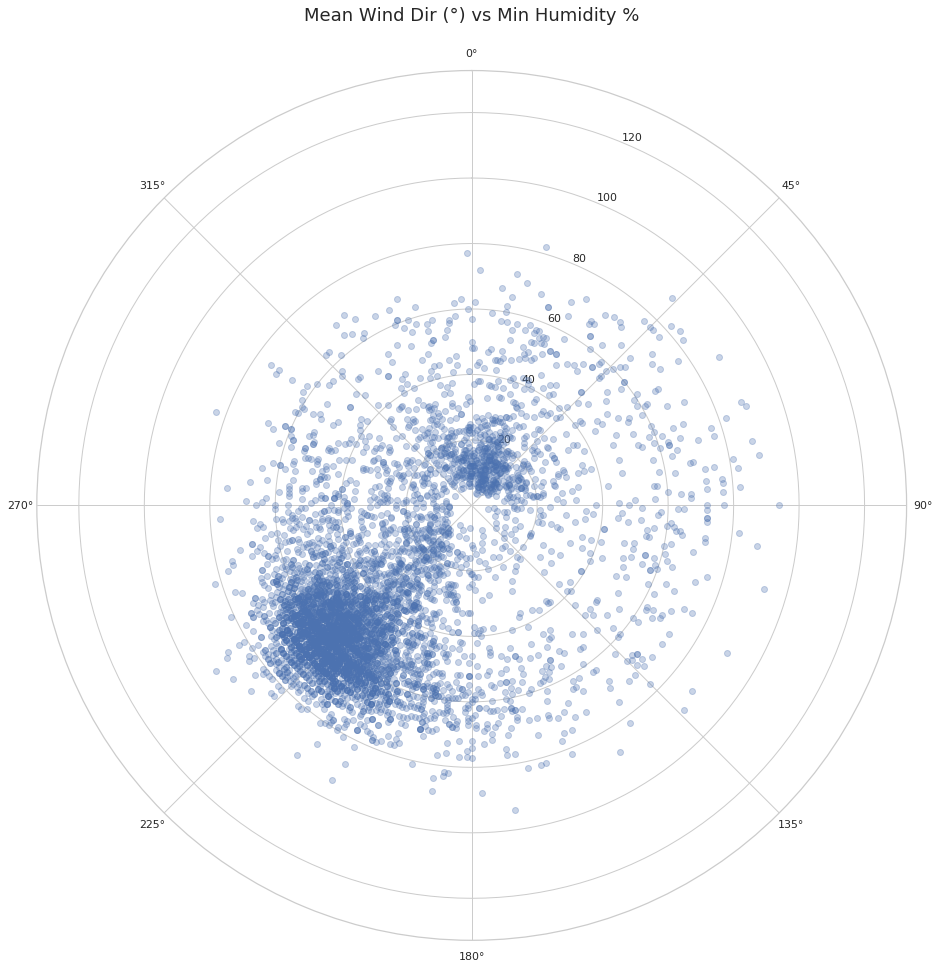

In [12]:
sns.set(style='whitegrid')
plt.figure(figsize=(20,16))

ax = plt.subplot(111, polar=True)
ax.scatter(x=[radians(x) for x in df['meanwdird'].values], 
           y=df['minhumidity'], alpha=0.3)
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)

plt.title('Mean Wind Dir (°) vs Min Humidity %', fontsize=18);

# Modeling - Gaussian NB

In [13]:
features = ['meanwdird', 'meanwindspdm', 'meantempm', 'meandewptm', 'meanpressurem', 
            'maxhumidity', 'minhumidity', 'maxtempm', 'mintempm', 'maxdewptm', 'mindewptm', 
            'maxpressurem', 'minpressurem', 'precipm']

In [14]:
X = df[features]
y = df['fog']

In [15]:
X = X.values.astype(np.float)
y = y.values.astype(np.float)

In [16]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [17]:
kf = KFold(n_splits=3)
kf.get_n_splits(X)

print(kf, '\n')

for train_index, test_index in kf.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

KFold(n_splits=3, random_state=None, shuffle=False) 

TRAIN: [1803 1804 1805 ... 5405 5406 5407] TEST: [   0    1    2 ... 1800 1801 1802]
TRAIN: [   0    1    2 ... 5405 5406 5407] TEST: [1803 1804 1805 ... 3603 3604 3605]
TRAIN: [   0    1    2 ... 3603 3604 3605] TEST: [3606 3607 3608 ... 5405 5406 5407]


In [18]:
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [19]:
print(confusion_matrix(y_test, y_pred))
print('\n\n')
print(classification_report(y_test, y_pred))

[[1508  194]
 [  39   61]]



              precision    recall  f1-score   support

         0.0       0.97      0.89      0.93      1702
         1.0       0.24      0.61      0.34       100

   micro avg       0.87      0.87      0.87      1802
   macro avg       0.61      0.75      0.64      1802
weighted avg       0.93      0.87      0.90      1802



Pickle model for later use

In [20]:
clf_pickle = GaussianNB()
clf_pickle.fit(X, y)
joblib.dump(clf_pickle, "GauissanNB_model.pkl")

['GauissanNB_model.pkl']

# Modeling - Decision Tree

But, fewer parameters are available from the weather underground API "current conditions" service than the "historical daily summary", so we will work with the Decision Tree Classifier since it performed best with said features.

In [21]:
features = ['meanwdird', 'meanwindspdm', 'meantempm', 'meandewptm', 'meanpressurem', 
            'mhumidity', 'precipm']

In [22]:
X = df[features]
y = df['fog']

X = X.values.astype(np.float)
y = y.values.astype(np.float)

sc = StandardScaler()
X = sc.fit_transform(X)

kf = KFold(n_splits=3)
kf.get_n_splits(X)

print(kf, '\n')

for train_index, test_index in kf.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

KFold(n_splits=3, random_state=None, shuffle=False) 

TRAIN: [1803 1804 1805 ... 5405 5406 5407] TEST: [   0    1    2 ... 1800 1801 1802]
TRAIN: [   0    1    2 ... 5405 5406 5407] TEST: [1803 1804 1805 ... 3603 3604 3605]
TRAIN: [   0    1    2 ... 3603 3604 3605] TEST: [3606 3607 3608 ... 5405 5406 5407]


In [23]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
predictions = dtree.predict(X_test)

In [24]:
print(confusion_matrix(y_test, predictions))
print('\n\n')
print(classification_report(y_test, predictions))

[[1616   86]
 [  84   16]]



              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95      1702
         1.0       0.16      0.16      0.16       100

   micro avg       0.91      0.91      0.91      1802
   macro avg       0.55      0.55      0.55      1802
weighted avg       0.91      0.91      0.91      1802



In [25]:
dtree_pickle = GaussianNB()
dtree_pickle.fit(X, y)
joblib.dump(dtree_pickle, "DTree_model.pkl")

['DTree_model.pkl']